In [373]:
# IMPORTING NECESSARY LIBRARIES

# Basic preprocessing/visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import warnings
warnings.filterwarnings("ignore")


# TIME SERIES
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from pmdarima.model_selection import train_test_split as tts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# ML (Feature Engineering)
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import MultiLabelBinarizer


# ALGORITHM
# Sampling
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

# Clustering
from sklearn.cluster import KMeans

# EVALUATION METRICS
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, precision_score, recall_score
from sklearn import metrics

In [374]:
# Importing movies dataset

movies=pd.read_csv("C:/Users/user/Downloads/DS_C14_Capstone_tmdb_5000_movies.csv") 
movies.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   

   runtime    status                                         tagline  \
0    162.0  Released                     Enter the World of Pandora.   
1    169.0  Released  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500

In [375]:
# Importing credits dataset 

credits=pd.read_csv("C:/Users/user/Downloads/DS_C14_Capstone_tmdb_5000_credits.csv")
credits.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

# Basic Preprocessing

In [376]:
# Dropping unnecesary columns from movies dataset

movies = movies.drop(["homepage"], axis=1)

# Dropping columns from credits dataset to avoid duplication 

credits = credits.drop(["title","movie_id"], axis=1)

# Merging the dataframes

df = pd.concat([movies,credits], axis=1)
df.head()

budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   16-07-2012  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   07-03-2012   284139100   

   runtime    status                                         tagline  \
0    162.0  Released                     Enter the World of Pandora.   
1    169.0  Released  At the end of the world, the adventure begins.   
2    148.0  Released                           A Plan No One Escapes   
3    165.0  Released                                 The Legend Ends   
4    132.0  Released            Lost in our world, found in another.   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                               John Carter           6.1        2124   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [377]:
# Defining a function for the basic info gain/ preprocessing of the dataset

def basic_prep():
    col = df.columns
    shape = df.shape
    dtyp = df.dtypes
    df["release_date"] = pd.to_datetime(df["release_date"],format='%d-%m-%Y')
    dup = df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    null = df.isnull().sum()
    df.dropna(inplace=True)
    info = df.info()
    desc = df.describe()
    for i in df:
        uniq = print(df[i].unique())
        
    for i in df:
        val_cnt = print(df[i].value_counts())
    
    return (col,shape,dtyp,dup,null,info,desc,uniq,val_cnt)

In [378]:
# Calling function 
basic_prep()

<class 'pandas.core.frame.DataFrame'>
Index: 3959 entries, 0 to 4801
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3959 non-null   int64         
 1   genres                3959 non-null   object        
 2   id                    3959 non-null   int64         
 3   keywords              3959 non-null   object        
 4   original_language     3959 non-null   object        
 5   overview              3959 non-null   object        
 6   popularity            3959 non-null   float64       
 7   production_companies  3959 non-null   object        
 8   production_countries  3959 non-null   object        
 9   release_date          3959 non-null   datetime64[ns]
 10  revenue               3959 non-null   int64         
 11  runtime               3959 non-null   float64       
 12  status                3959 non-null   object        
 13  tagline               3

(Index(['budget', 'genres', 'id', 'keywords', 'original_language', 'overview',
        'popularity', 'production_companies', 'production_countries',
        'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
        'vote_average', 'vote_count', 'cast', 'crew'],
       dtype='object'),
 (4803, 19),
 budget                    int64
 genres                   object
 id                        int64
 keywords                 object
 original_language        object
 overview                 object
 popularity              float64
 production_companies     object
 production_countries     object
 release_date             object
 revenue                   int64
 runtime                 float64
 status                   object
 tagline                  object
 title                    object
 vote_average            float64
 vote_count                int64
 cast                     object
 crew                     object
 dtype: object,
 0,
 budget                    0
 genres

# JSON columns Preprocessing

# Crew

In [379]:
def extract_names(cell):
    json_crew = json.loads(cell)  # Converting JSON string to Python list of dictionaries
    Editor = []
    for item in json_crew:
        if item.get("job") == "Editor":
            Editor.append(item.get("name"))
    return Editor

df['Editors'] = df['crew'].apply(extract_names)  # Apply the function to the JSON column

In [380]:
def extract_names(cell):
    json_crew = json.loads(cell)  # JSON string to Python list of dictionaries
    Writer = []
    for item in json_crew:
        if item.get("job") == "Writer":
            Writer.append(item.get("name"))
    return Writer

df['Writers'] = df['crew'].apply(extract_names)  # Apply the function to the JSON column

In [381]:
def extract_names(cell):
    json_crew = json.loads(cell)  # JSON string to Python list of dictionaries
    Producer = []
    for item in json_crew:
        if item.get("job") == "Producer":
            Producer.append(item.get("name"))
    return Producer

df['Producers'] = df['crew'].apply(extract_names)  # Apply the function to the JSON column

In [382]:
def extract_names(cell):
    json_crew = json.loads(cell)  # JSON string to Python list of dictionaries
    Director = []
    for item in json_crew:
        if item.get("job") == "Director":
            Director.append(item.get("name"))
    return Director

df['Directors'] = df['crew'].apply(extract_names)  # Apply the function to the JSON column

In [383]:
# Dropping original crew column after retaining the necessary names
df = df.drop("crew", axis=1)

# Genre, Production Companies, Production Countries, Cast

In [384]:
# Defining function for converting the column from json format to list

def extract(df):           
    cols = json.loads(df)
    return list(name["name"] for name in cols)
for i in ["genres","production_companies","production_countries","cast","keywords"]:
    df[i] =df[i].apply(extract) # Calling function

In [385]:
# Assuming the first values of each of the following columns as most important and retaining them

for i in ["overview","production_companies","production_countries","cast",'Editors','Writers','Producers','Directors']:
    df[i]=df[i].astype(str)
    df[i]=df[i].str.replace('\[|\]','', regex=True)
    df[i] = df[i].str.replace("'", "")

for i in ["production_companies","production_countries","cast",'Editors','Writers','Producers','Directors']:
    df[i] = df[i].str.split(',').str[0]
    
df.dropna(inplace=True) # Dropping null values if any 

In [386]:
# Checking for empty cells in each column

for i in df:
    print(i,df[df[i]==""].shape)
df.shape

budget (0, 22)
genres (0, 22)
id (0, 22)
keywords (0, 22)
original_language (0, 22)
overview (0, 22)
popularity (0, 22)
production_companies (140, 22)
production_countries (75, 22)
release_date (0, 22)
revenue (0, 22)
runtime (0, 22)
status (0, 22)
tagline (0, 22)
title (0, 22)
vote_average (0, 22)
vote_count (0, 22)
cast (8, 22)
Editors (815, 22)
Writers (2780, 22)
Producers (636, 22)
Directors (8, 22)


(3959, 22)

In [387]:
# Dropping the writers column as more than 33% records are empty
df = df.drop(["Writers"], axis=1)

In [388]:
# Replacing the few empty cell columns with 'Unavailable'
for i in df:
    df[i] = df[i].replace([""], "Unavailable")

In [389]:
# Status column has neglegible number of cells with values other than released and hence dropping them to avoid 
# unnecessary variations in data

indices = (df[df["status"]!="Released"]).index
df.drop(index=indices, axis=0, inplace=True)
df.reset_index(inplace=True)
df = df.drop("index", axis=1)

In [390]:
# Creating a new column Rating, based on certain calculations

rating = []
M = df["vote_average"].mean()

for i in df["vote_average"]:
    if i>M :
        rating.append("Good")
    elif i>=(M/2) and i<=M:
        rating.append("Average")
    else:
        rating.append("Poor")
        
df["ratings"] = rating

# Outliers check

In [391]:
# Defining a function to check the presence of outliers

def outlier_check():
    for i in ['budget','popularity','revenue', 'runtime', 'vote_average', 'vote_count']:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upfenc = q3 + (1.5*iqr)
        lofenc = q1 - (1.5*iqr)
        max_i = df[i].max()
        min_i = df[i].min()
        print(i)
        print("upperfence:",upfenc,"||","max:",max_i)
        print("lowerfence:",lofenc,"||","min:",min_i)
        print("-"*50)
    return

In [392]:
outlier_check()

budget
upperfence: 107250000.0 || max: 380000000
lowerfence: -58750000.0 || min: 0
--------------------------------------------------
popularity
upperfence: 69.817138 || max: 875.581305
lowerfence: -30.643390000000004 || min: 0.000372
--------------------------------------------------
revenue
upperfence: 284233326.5 || max: 2787965087
lowerfence: -169305597.5 || min: 0
--------------------------------------------------
runtime
upperfence: 154.0 || max: 338.0
lowerfence: 58.0 || min: 0.0
--------------------------------------------------
vote_average
upperfence: 8.6 || max: 10.0
lowerfence: 3.7999999999999994 || min: 0.0
--------------------------------------------------
vote_count
upperfence: 2127.0 || max: 13752
lowerfence: -1121.0 || min: 0
--------------------------------------------------


In [393]:
# Replacing 0 values with the average of the respective columns for a reliable insight

for i in ['budget','popularity','revenue', 'runtime', 'vote_average', 'vote_count']:
    df[i] = df[i].replace([0],df[i].mean())

In [394]:
outlier_check()

budget
upperfence: 94500000.0 || max: 380000000.0
lowerfence: -37500000.0 || min: 1.0
--------------------------------------------------
popularity
upperfence: 69.817138 || max: 875.581305
lowerfence: -30.643390000000004 || min: 0.000372
--------------------------------------------------
revenue
upperfence: 244395575.0 || max: 2787965087.0
lowerfence: -102909345.0 || min: 5.0
--------------------------------------------------
runtime
upperfence: 154.0 || max: 338.0
lowerfence: 58.0 || min: 25.0
--------------------------------------------------
vote_average
upperfence: 8.45 || max: 10.0
lowerfence: 4.050000000000001 || min: 1.9
--------------------------------------------------
vote_count
upperfence: 2122.5 || max: 13752.0
lowerfence: -1113.5 || min: 1.0
--------------------------------------------------


# Visualization

In [395]:
# Retaining numerical columns in a seperate dataframe for visualization
num=df.select_dtypes(include="number")

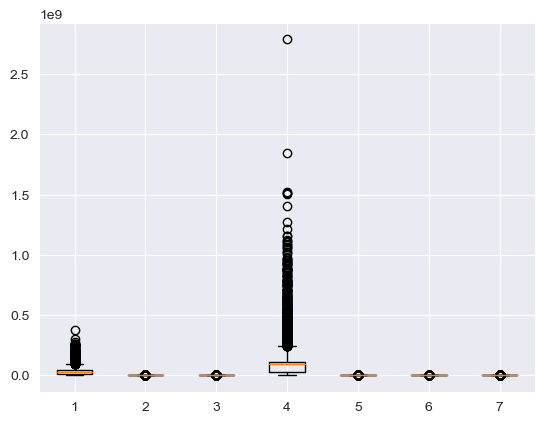

In [396]:
# Creating a boxplot for visualizing the presence and distribution of outliers in the dataset

plt.boxplot(num);

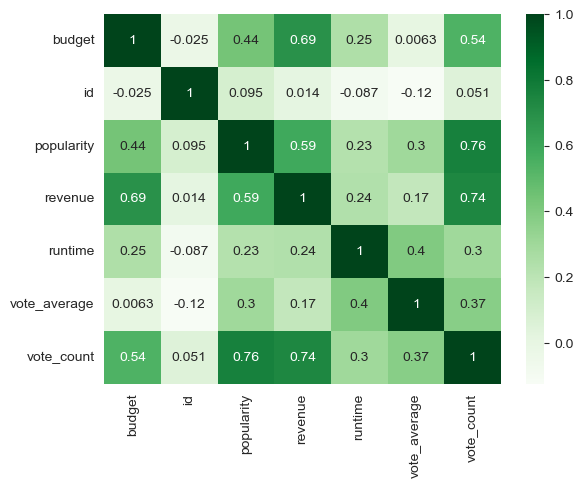

In [397]:
# Creating a hreatmap for visualizing the correlation among various numerical columns of the dataset

sns.heatmap(num.corr(), annot=True, cmap="Greens");

In [398]:
# Creating Histograms for visualizing the distribution of various columns of the dataset

fig,ax=plt.subplots(3,2,figsize=(15,12))
sns.histplot(df, x=df["budget"],ax=ax[0,0],bins=20,color="darkolivegreen",kde=True)
sns.histplot(df, x=df["revenue"],ax=ax[0,1],bins=20,color="yellowgreen",kde=True)
sns.histplot(df, x=df["popularity"],ax=ax[1,0],bins=20,color="yellowgreen",kde=True)
sns.histplot(df, x=df["runtime"],ax=ax[1,1],bins=20,color="darkolivegreen",kde=True)
sns.histplot(df, x=df["vote_average"],ax=ax[2,0],bins=20,color="darkolivegreen",kde=True)
sns.histplot(df, x=df["vote_count"],ax=ax[2,1],bins=20,color="yellowgreen",kde=True);

In [399]:
# Visualizing the relationship pattern of Revenue column with the other most correlated columns of the dataset

fig,ax=plt.subplots(2,2,figsize=(12,7))
sns.regplot(x=df["budget"],y=df["revenue"],scatter_kws={"color":"darkolivegreen"}, line_kws={"color":"yellowgreen"},ax=ax[0,0])
sns.regplot(x=df["popularity"],y=df["revenue"],scatter_kws={"color":"darkolivegreen"}, line_kws={"color":"yellowgreen"},ax=ax[0,1])
sns.regplot(x=df["vote_count"],y=df["revenue"],scatter_kws={"color":"darkolivegreen"}, line_kws={"color":"yellowgreen"},ax=ax[1,0])
sns.regplot(x=df["vote_average"],y=df["revenue"],scatter_kws={"color":"darkolivegreen"}, line_kws={"color":"yellowgreen"},ax=ax[1,1])
sns.set_style("darkgrid")

**Interpretation: The Revenue of movies are highly correlated with budget, popularity and vote count of the movies which eventually increases the vote average.**

In [400]:
df.head(1)

budget                                         genres     id  \
0  237000000.0  [Action, Adventure, Fantasy, Science Fiction]  19995   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   

      production_companies      production_countries release_date  ...  \
0  Ingenious Film Partners  United States of America   2009-12-10  ...   

     status                      tagline   title vote_average vote_count  \
0  Released  Enter the World of Pandora.  Avatar          7.2    11800.0   

              cast            Editors      Producers      Directors ratings  
0  Sam Worthington  Stephen E. Rivkin  James Cameron  James Cameron    Good  

[1 rows x 22 columns]

# Explode for TABLEAU

In [401]:
# Retaining the unique genre values of each movie in seperate rows for the ease of visualization

exploded = df.explode('genres')

In [402]:
# Saving the Exploded dataset in an excel file

#exploded.to_excel('TMDB_exploded_for_TABLEAU.xlsx', index=False)

In [403]:
# Saving the cleaned dataset in an excel file

#df.to_excel('TMDB_Dataset_cleaned.xlsx', index=False)

# ML dataframe

In [404]:
# Preparing dataset for building ML models

dummies = pd.get_dummies(exploded["genres"], dtype=int)
dummies = dummies.groupby(by=dummies.index, axis=0).max()
df = pd.concat([df,dummies], axis = 1)

# Time Series Analysis

In [ ]:
# Selecting columns for time series analysis

df_ts = df[["release_date","revenue"]]
df_ts.dtypes

In [ ]:
# Visualizing the revenue column

sns.histplot(df_ts, kde=True);

In [ ]:
# Checking for outliers

q1 = df_ts["revenue"].quantile(0.25)
q3 = df_ts["revenue"].quantile(0.75)
iqr = q3 - q1
upfenc = q3 + (1.5*iqr)
lofenc = q1 - (1.5*iqr)
print(upfenc)
print(lofenc)

In [ ]:
# Treating outliers

indices = df_ts[(df_ts["revenue"]<-102909345) | (df_ts["revenue"]>244395575)].index
df_ts.drop(index = indices, axis=0, inplace=True)

In [ ]:
# Preprocessing for time series analysis

df_ts = df_ts.sort_values(by=["release_date"])
df_ts.drop(index=3840,axis=0,inplace=True)
df_ts = df_ts.set_index("release_date")
df_ts = df_ts["revenue"]
df_ts

In [ ]:
# Resampling the data

df_ts = df_ts.resample("2Y").mean()
df_ts = df_ts.dropna()
df_ts = pd.DataFrame(df_ts)
df_ts.value_counts().sum()

In [ ]:
# Setting frequency of seasonality as 1 year

fig = seasonal_decompose(df_ts,period = 1).plot()

In [ ]:
# Visualization

fig,ax = plt.subplots(figsize=(10,7))
plt.plot(df_ts, c="blue",label = "revenue")
plt.legend();

**INTERPRETATION: No Seasonality, Additive trend**

**Simple Smoothing**

In [ ]:
# Assigning colors

albega_colors = {0.0: "yellow", 0.2:"purple", 0.4:"red", 0.6:"green", 0.8:"aqua", 1.0:"fuchsia"}

In [ ]:
# Visualizing the smoothened data with simple smoothing

fig,ax = plt.subplots(figsize=(20,12))
plt.plot(df_ts,label="revenue", color="black", linewidth=3)
for alpha, c in albega_colors.items():
    model1 = SimpleExpSmoothing(df_ts).fit(smoothing_level=alpha,optimized = False)
    simple = model1.fittedvalues
    plt.plot(simple, color=c, linewidth=2)
    plt.legend(["Original",albega_colors]);

**alpha : 0.6**

**Double Smoothing**

In [ ]:
# Visualizing the smoothened data with double smoothing

fig,ax = plt.subplots(figsize=(20,12))
plt.plot(df_ts,label="revenue", color="black", linewidth=3)
for beta, c in albega_colors.items():
    model2 = ExponentialSmoothing(df_ts, trend="additive").fit(smoothing_level=0.6, smoothing_trend = beta)
    double = model2.fittedvalues
    plt.plot(double, color=c, linewidth=2)
    plt.legend(["Original",albega_colors]);

**beta : 0.6**

**Final Smoothened**

In [ ]:
# Final visualization of the smoothened data 

fig,ax = plt.subplots(figsize=(15,7))
plt.plot(df_ts,label="Temperature", color="black", linewidth=3)
final_model = ExponentialSmoothing(df_ts, trend="additive", seasonal="additive",seasonal_periods=2).fit(smoothing_level=0.6, smoothing_trend = 0.6)
final_df = final_model.fittedvalues
plt.plot(final_df, color=c, linewidth=2)
plt.legend(["Original","Smooth"]);

In [ ]:
# Running stationarity check on smoothened data

def myadfuller(mycol):
    p_val = adfuller(mycol)[1]
    print(p_val)
    if p_val < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")
myadfuller(final_df)

In [ ]:
# Turning the non stationary data into stationary

diff_1 = final_df.diff(1)
diff_1 = diff_1.dropna()
myadfuller(diff_1)

In [ ]:
# Splitting the data

tr,te=tts(diff_1, test_size=0.3)

**Plotting the acf and pacf graphs**

In [ ]:
plot_acf(tr, lags = 10);

In [ ]:
q = 1

In [ ]:
plot_pacf(tr, lags = 10);

In [ ]:
p = 1

**ARIMA model with NO Seasonality and NO Stationarity : p,d=1,q**

In [ ]:
# Checking for p and q values using auto arima

k = auto_arima(tr, start_p=1, max_p=3, d=1, start_q=1, max_q=3, error_action="ignore", trace=True)
k.summary

In [ ]:
# Checking for optimal p and q values

lowest_aic = float("inf")

for p in range(0,12):
    for q in range(0,12):
        temp_model = ARIMA(diff_1, order=(p,1,q))
        selection = temp_model.fit()
        
        if selection.aic < lowest_aic:
            lowest_aic = selection.aic
            final_p = p
            final_q = q
print("final p", p,"final q", q,"select_aic", lowest_aic)

In [ ]:
# Initializing final model

final_model = ARIMA(tr, order=(11,1,11)).fit()

In [ ]:
# Performing ljungbox test to ckeck model reliability

def myfun(mymodel):
    lj_arma = sm.stats.acorr_ljungbox(mymodel.resid, lags=[10], return_df = True)
    p_arma = lj_arma["lb_pvalue"].values[0]
    if p_arma < 0.05:
        print("Reject model. Bad performance")
    else:
        print("Accept model. Good performance")
            
myfun(final_model)

In [ ]:
# Checking model performance

def performance_check(mymodel):
    mypred = mymodel.predict(0, len(tr) - 1)
    print(mean_squared_error(tr, mypred, squared = False))
performance_check(final_model)

In [ ]:
# Checking model performance

train_pred = final_model.predict(0, len(tr) + 2)
ts_forecast = final_model.forecast(20)
pred = final_model.predict(0, len(te)+30)
preddd = final_model.predict(len(tr), len(tr)+ len(te)-1)
print(mean_squared_error(te, preddd, squared = False))

In [ ]:
# Visualizing the final forecast and future prediction

fig, ax = plt.subplots(1,1, figsize =(8,5))
plt.plot(tr, color="black")
plt.plot(ts_forecast, color="green")
plt.plot(train_pred, color="red")
plt.legend(["Original","forecast","Predicted"])
plt.xlabel("Year")
plt.ylabel("Revenue")

# FEATURE ENGINEERING

In [405]:
# Label encoding and scaling the necessary columns and formatting them for ML models

le = preprocessing.LabelEncoder()
sc = StandardScaler()

for i in ['original_language','production_companies','production_countries','title','cast','Editors','Producers','Directors','ratings']:
    df[i] = df[i].astype('category')
    df[i] = le.fit_transform(df[i])
    
df2 = df.copy()

for i in ['budget','popularity','revenue', 'runtime','vote_average', 'vote_count']:
    df[i] = sc.fit_transform(df[i].to_numpy().reshape(-1,1))

# MODEL BUILDING

# CLASSIFICATION GENRE

In [100]:
# Selecting dependent and independent columns for classifying a movie according to genres
x_gen = df["overview"]
y_gen = df["genres"]

In [101]:
# Preparing the dependent column to a suitable format
x_gen = x_gen.astype(str)

In [102]:
# Checking shapes of the dependent and independent columns
print("Shape x :" ,x_gen.shape)
print("Shape y :" ,y_gen.shape)

Shape x : (3957,)
Shape y : (3957,)


In [103]:
# Assigning a stop word list 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords_list = list(ENGLISH_STOP_WORDS)

In [106]:
# Using the TfidfVectorizer to convert text documents into vectors
vectorizer = TfidfVectorizer(lowercase=True,stop_words=stopwords_list, strip_accents='unicode',min_df=5)
x_gen = vectorizer.fit_transform(x_gen)

In [107]:
# Using the MultiLabelBinarizer to transform multiple labels into a binary representation
label_binarizer = MultiLabelBinarizer(sparse_output=False)
y_gen = label_binarizer.fit_transform(y_gen)

In [108]:
# Splitting the selected columns in a set of 4 parts in a ratio of 8:2
x_gen_train, x_gen_test, y_gen_train, y_gen_test = train_test_split(x_gen, y_gen, test_size=0.2, random_state=None)

**Model 1**

In [41]:
# Using Logistic Regressor as a base algorithm
clf_gen1 = OneVsRestClassifier(LogisticRegression(solver="liblinear",penalty="l1")).fit(x_gen_train,y_gen_train)
print(clf_gen1.score(x_gen_train,y_gen_train)*100)

11.532385466034755


In [42]:
# Making predictions and checking accuracy score
y_gen_pred1 = clf_gen1.predict(x_gen_test)
print(f1_score(y_gen_test,y_gen_pred1,average="micro")*100)

33.99014778325123


**Model 2**

In [43]:
# Implementing boosting as the accuracy score of the Logistic Regression is greater than the training score (Underfit)

In [44]:
# Using XG Boost CLassifier as a base algorithm
clf_gen2 = OneVsRestClassifier(xgb.XGBClassifier()).fit(x_gen_train,y_gen_train)
print(clf_gen2.score(x_gen_train, y_gen_train)*100)

55.79778830963665


In [45]:
# Making predictions and checking accuracy score
y_gen_pred2 = clf_gen2.predict(x_gen_test)
print(f1_score(y_gen_test,y_gen_pred2,average="micro")*100)

41.99877375843041


**Model 3**

In [46]:
# Implementing a second boosting algorithm to improve the performance

In [109]:
# Using Gradient Boost CLassifier as a base algorithm
clf_gen3 = OneVsRestClassifier(SGDClassifier(shuffle=True, loss='hinge', penalty='l2', max_iter=10)).fit(x_gen_train,y_gen_train)
print(clf_gen3.score(x_gen_train, y_gen_train)*100)

86.54028436018957


In [110]:
# Making predictions and checking accuracy score
y_gen_pred3 = clf_gen3.predict(x_gen_test)
print(f1_score(y_gen_test,y_gen_pred3,average="micro")*100)

51.91608391608391


**Using model for predicting new data**

In [171]:
def genre_Prediction():
    overview_input = (input("Enter the movie description/overview :"))
    print("*"*100)
    genre_Pred_df = pd.DataFrame({'overview':[overview_input]})
    genre_Pred_df = genre_Pred_df.astype(str)
    genre_Pred_df = vectorizer.transform(genre_Pred_df)
    genre_pred = clf_gen3.predict(genre_Pred_df)
    print("Movie belongs to", genre_pred ,"genres.")
    
genre_Prediction()

Enter the movie description/overview :'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'
****************************************************************************************************
Movie belongs to [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] genres.


**INTERPRETATION: Not a very reliable model.**

# Regression: Predict Revenue

In [113]:
# Selecting dependent and independent columns for cpredicting the revenue of a movie

y_reg = df.loc[:,["revenue"]]
x_reg = df.loc[:,['budget','vote_count','Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']]

In [114]:
# Splitting the selected columns in a set of 4 parts in a ratio of 8:2

x_reg_train,x_reg_test,y_reg_train,y_reg_test = train_test_split(x_reg,y_reg, train_size=0.8, random_state=42)

**Model 1**

In [51]:
# Fitting the model and evaluating the training performance

lin_reg = LinearRegression()
lin_reg.fit(x_reg_train,y_reg_train)
round(lin_reg.score(x_reg_train,y_reg_train)*100,2)

68.11

In [52]:
# Making prediction and evaluating performance

y_reg_pred = lin_reg.predict(x_reg_test) 
round(mean_squared_error(y_reg_test,y_reg_pred)*100,2)  

32.05

**Model 2**

In [53]:
# Fitting the model and evaluating the training performance

dtr = DecisionTreeRegressor(max_leaf_nodes = 10)
dtr.fit(x_reg_train,y_reg_train)
dtr.score(x_reg_train,y_reg_train)*100

72.45987634717797

In [54]:
# Making prediction and evaluating performance

y_pred = dtr.predict(x_reg_test)
mean_squared_error(y_reg_test,y_pred)*100

38.347017620940285

**Model 3**

In [132]:
# Initializing a model, Splitting the data and setting parameters

rfr = RandomForestRegressor(oob_score = True) 
kf = KFold(n_splits=10)  

parameters = {                              
    "max_depth" : [10,15,20],
    "n_estimators" : [50,100,200]
}    

In [56]:
# Implementing Grid Search to extract best parameters for creating the model

grid_search = GridSearchCV(rfr, param_grid= parameters, cv=kf, scoring = "r2")
grid_search.fit(x_reg_train,y_reg_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.6990149014140282
RandomForestRegressor(max_depth=10, n_estimators=200, oob_score=True)


In [133]:
# Fitting the model with best parameters

rfr_best = RandomForestRegressor(max_depth=10, n_estimators=200, oob_score=True)
rfr_best.fit(x_reg_train,y_reg_train)

RandomForestRegressor(max_depth=10, n_estimators=200, oob_score=True)

In [134]:
# Checking the cross validation score(training performance) & out of bag score(testing performance)

print(cross_val_score(rfr_best,x_reg_train,y_reg_train, cv=kf, scoring='r2').mean()*100) 
print((rfr_best.oob_score_)*100)

69.86880544493162
70.93321077757776


**Using model for predicting new data**

In [429]:
details = []

for budget in range(0,50):
    budget = int(input("Enter Budget: "))
    if budget>0:
        details.append(budget)
        break
    else:
        print("Invalid entry. Please enter valid budget amount.")
        
for vote in range(0,50):
    vote = int(input("Enter number of votes for the movie : "))
    if vote>=0:
        details.append(vote)
        break
    else:
        print("Invalid entry. Please enter valid vote amount.")
        

for i in ['Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']:
    user = input(("Is movie of the genre", i,"? [yes / no]: "))
    if user in ["yes","YES","Yes","Y","y"]:
        details.append(1)
    elif user in ["no","NO","No","N","n"]:
        details.append(0)
        continue
    else:
        print("Invalid entry. Please enter from given options.")
        
        
details = pd.DataFrame([details], columns=['budget','vote_count','Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'])

for i in ['budget','vote_count']:
    details[i] = sc.transform(details[i].to_numpy().reshape(-1,1))
    
    
revenue_pred = rfr_best.predict(details)
print("*"*100)
print("The estimated revenue of the movie is, $",revenue_pred)

KeyboardInterrupt: Interrupted by user

**Interpretation: Good reliable model**

# Classification : Predict Rating

In [406]:
# Selecting dependent and independent columns for classifying a movie according to rating

y_class1 = df.loc[:,"ratings"]
x_class1 = df.loc[:,['vote_average']]

In [407]:
# Splitting the selected columns in a set of 4 parts in a ratio of 8:2

x_class1_train,x_class1_test,y_class1_train,y_class1_test = train_test_split(x_class1,y_class1, train_size=0.8, random_state=42)

**Model 1**

In [408]:
# Fitting the model and evaluating the training performance

log_reg = LogisticRegression()
log_reg.fit(x_class1_train,y_class1_train)
round(log_reg.score(x_class1_train,y_class1_train)*100,2)

99.18

In [409]:
# Making prediction and evaluating performance

y_class1_pred1 = log_reg.predict(x_class1_test)
round(f1_score(y_class1_test, y_class1_pred1, average='weighted')*100,2)

98.49

**Model 2**

In [63]:
# Fitting the model and evaluating the training performance

svc = SVC()
svc.fit(x_class1_train,y_class1_train)
round(svc.score(x_class1_train,y_class1_train)*100,2)

99.59

In [64]:
# Making prediction and evaluating performance

y_class1_pred2 = svc.predict(x_class1_test)                       
print(round(f1_score(y_class1_test, y_class1_pred2, average="weighted")*100,2))

99.73


**Model 3**

In [65]:
# Initializing a model, Splitting the data and setting parameters (Hyperparameter Tuning)

rfc = RandomForestClassifier(oob_score = True)
rskf = RepeatedStratifiedKFold(n_splits=3)

parameters = {
    "max_depth" : [10,20],
    "n_estimators" : [100,200]
}

In [66]:
# Implementing Grid Search to extract best parameters for creating the model

grid_search = GridSearchCV(rfc, param_grid= parameters, cv=rskf, scoring = "f1_weighted")
grid_search.fit(x_class1_train,y_class1_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9997599598658049
RandomForestClassifier(max_depth=10, oob_score=True)


In [67]:
# Fitting the model with best parameters

rfc_best = RandomForestClassifier(max_depth=10, oob_score=True)
rfc_best.fit(x_class1_train,y_class1_train)

RandomForestClassifier(max_depth=10, oob_score=True)

In [68]:
# Checking the cross validation score(training performance) & out of bag score(testing performance)

print(cross_val_score(rfc_best,x_class1,y_class1, cv=rskf, scoring='f1_weighted').mean()*100) 
print((rfc_best.oob_score_)*100) 

99.99065178834135
100.0


**Using model for predicting new data**

In [428]:
vote_avg_input = float(input("Enter the vote average of the movie: "))
rating_pred = pd.DataFrame({'vote_average':[vote_avg_input]})
rating_pred["vote_average"] = sc.transform(rating_pred["vote_average"].to_numpy().reshape(-1,1))
predicted_rating = log_reg.predict(rating_pred)
if predicted_rating==0:
    print("Rating: Average")
elif predicted_rating==1:
    print("Rating: Good")
else:
    print("Rating: Poor")

Enter the vote average of the movie: -6.84456
Rating: Poor


**Interpretation: Good reliable model**

# CLUSTERING

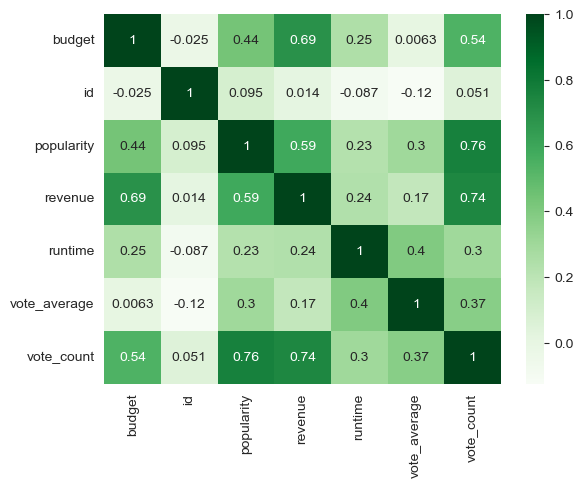

In [69]:
# Checking correlation using a heatmap

sns.heatmap(num.corr(), annot=True, cmap="Greens");

**Interpretation: Vote count is highly correlated with popularity and revenue. Hence with be considering these three columns for obtaining clusters.** 

In [70]:
# df is label encoded and scaled
# df2 is label encoded not scaled

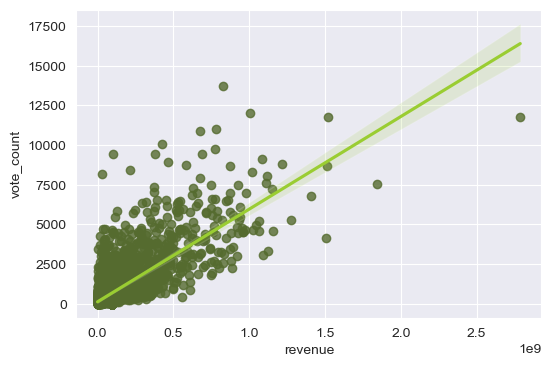

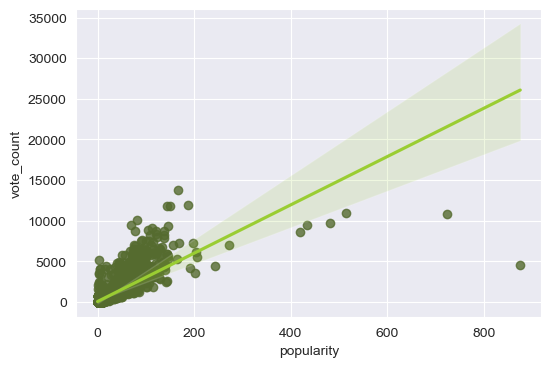

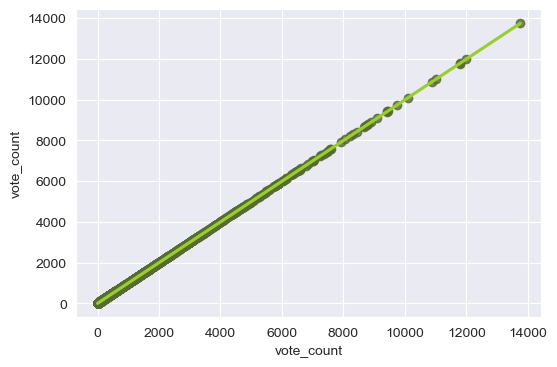

In [71]:
# Plotting the relationship between most correlated columns

for i in ["revenue","popularity","vote_count"]:
    fig,ax=plt.subplots(figsize=(6,4))
    sns.regplot(x=df2[i], y=df2["vote_count"], scatter_kws={"color":"darkolivegreen"}, line_kws={"color":"yellowgreen"})
    plt.xlabel(i)
    plt.ylabel("vote_count")

In [72]:
#df.drop("clusters1",axis=1,inplace=True)

In [430]:
# Feature selection for clustering

clust_col = df2.loc[:,["revenue","vote_count","popularity"]]

In [431]:
# Initializing a KMeans model and fitting values to it

clustmodel1 = KMeans(n_clusters=3, random_state=None)
clustmodel1.fit(clust_col)

KMeans(n_clusters=3)

In [432]:
# Predicting cluster values

clusters1 = clustmodel1.predict(clust_col)
clusters1

array([1, 1, 1, ..., 0, 0, 0])

In [433]:
# Checking the reliability of clusters

sil_score1 = metrics.silhouette_score(clust_col,clusters1)
sil_score1*100

73.40552499532006

In [77]:
df["clusters1"] = clusters1

In [78]:
# Plotting optimal clusters

segments  = ["Low popularity & revenue","Moderate popularity & revenue","High popularity & revenue"]
plt.figure(figsize=(7,5))
mycolors = ["lightcoral","cornflowerblue","chartreuse"]
for i in range(3):
    plt.scatter(x=df.loc[(df.clusters1==i),'revenue'],\
                y = df.loc[(df.clusters1==i),'vote_count'],\
                c = mycolors[i],label=segments[i])
plt.title('Cluster chart')
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.legend(segments,loc='upper right');

**Interpretation: Movies with less popularity have low votes and revenue. Movies with moderate popularity have comparatively higher votes and revenue. Movies with high popularity have higher votes and have generated high revenues.**

In [79]:
# Representation of clusters in a 3 Dimensional space

fig = px.scatter_3d(df, x='revenue', y='vote_count', z='popularity', color='clusters1', color_continuous_scale="viridis",template="plotly_dark")
fig.show()


**Using model for predicting new data**

In [436]:
details2 = []

for revenue in range(0,50):
    revenue = int(input("Enter revenue: "))
    if revenue>0:
        details2.append(revenue)
        break
    else:
        print("Invalid entry. Please enter valid revenue amount.")
        
for vote in range(0,50):
    vote = int(input("Enter number of votes for the movie : "))
    if vote>=0:
        details2.append(vote)
        break
    else:
        print("Invalid entry. Please enter valid vote amount.")
        
for popularity in range(0,50):
    popularity = int(input("Enter popularity of the movie : "))
    if popularity>=0:
        details2.append(popularity)
        break
    else:
        print("Invalid entry. Please enter valid popularity.")
        
        
        
clustering_pred = pd.DataFrame({'revenue':[revenue],'vote_count':[vote],'popularity':[popularity]})
for i in ["revenue","vote_count","popularity"]:
    clustering_pred[i] = sc.transform(clustering_pred[i].to_numpy().reshape(-1,1))
    

print("*"*100)
predicted_cluster = clustmodel1.predict(clustering_pred)
if predicted_cluster==0:
    print("Low popularity & revenue")
elif predicted_rating==1:
    print("Moderate popularity & revenue")
else:
    print("High popularity & revenue")

Enter revenue: 634546356
Enter number of votes for the movie : 5124
Enter popularity of the movie : 246
High popularity & revenue


**Interpretation: Good reliable model**